In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import generate_data
reload(generate_data)
from generate_data import *


# Generate Data

### Set V(x) and initial conditions for each experiment

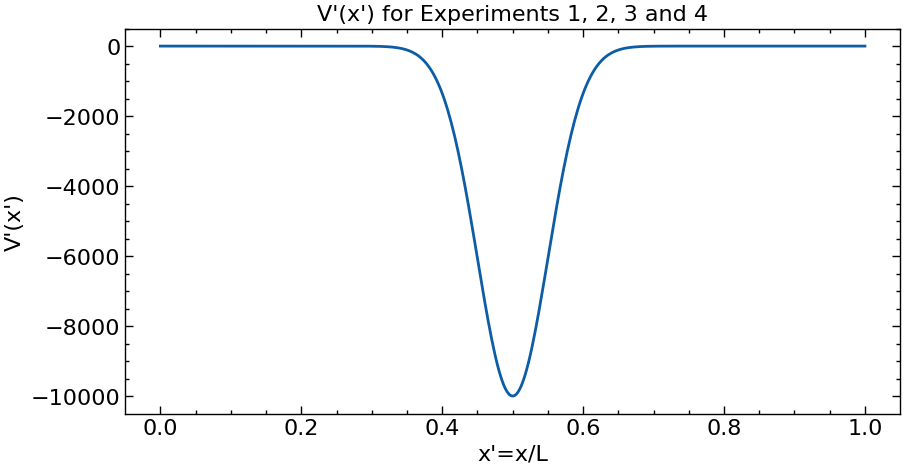

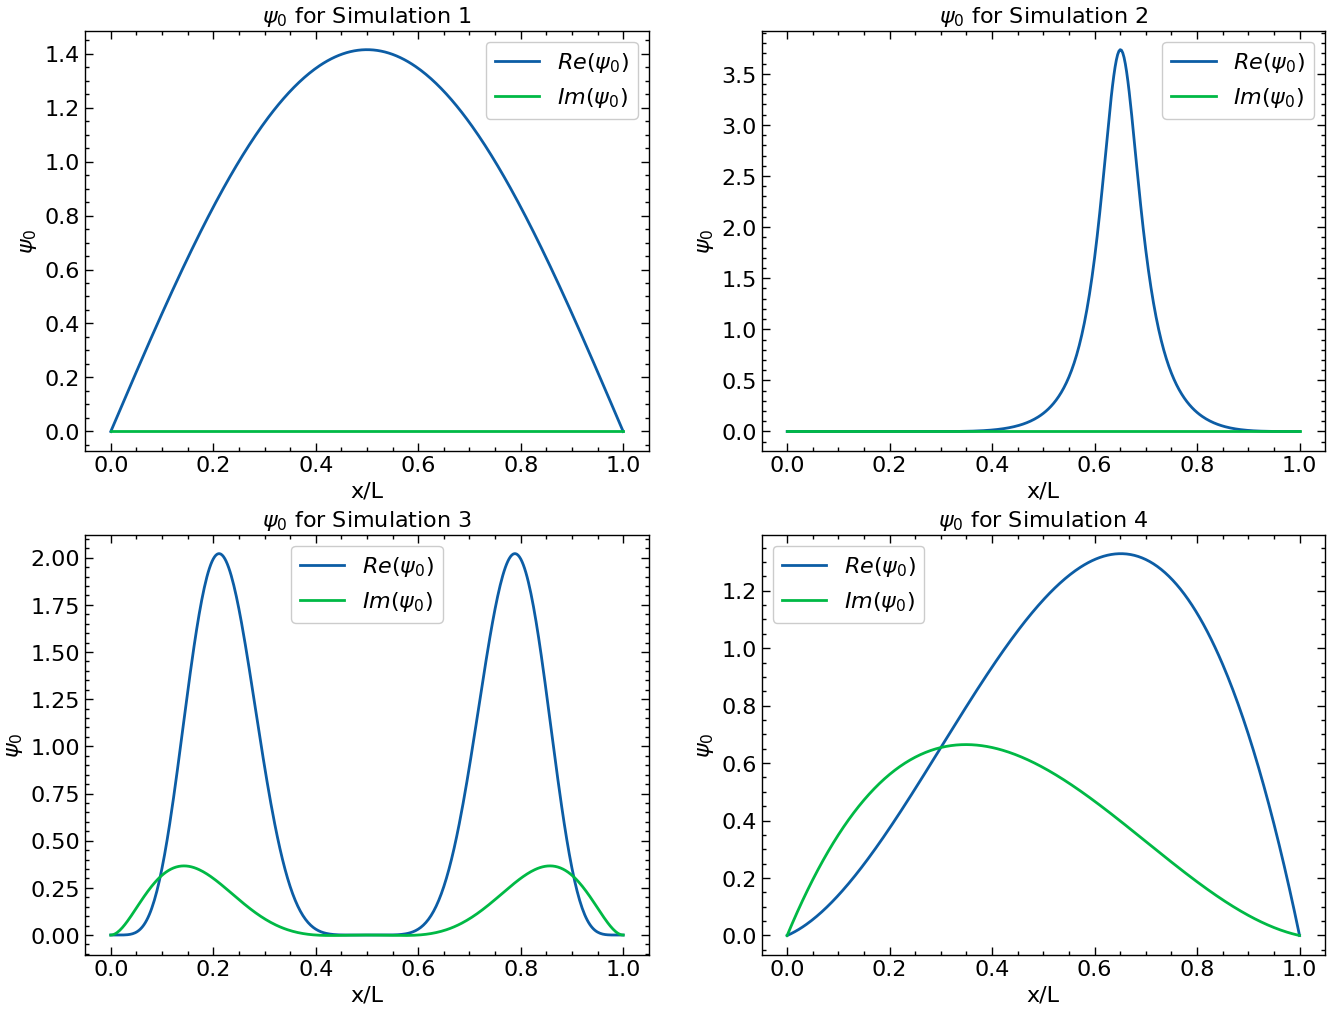

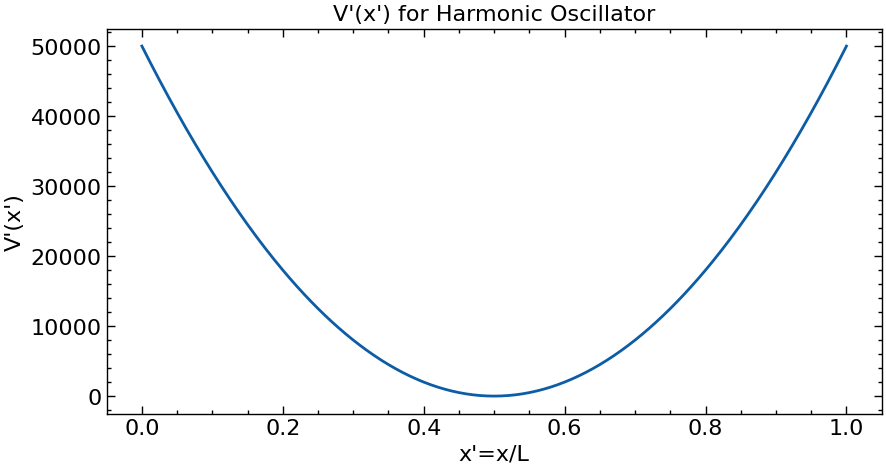

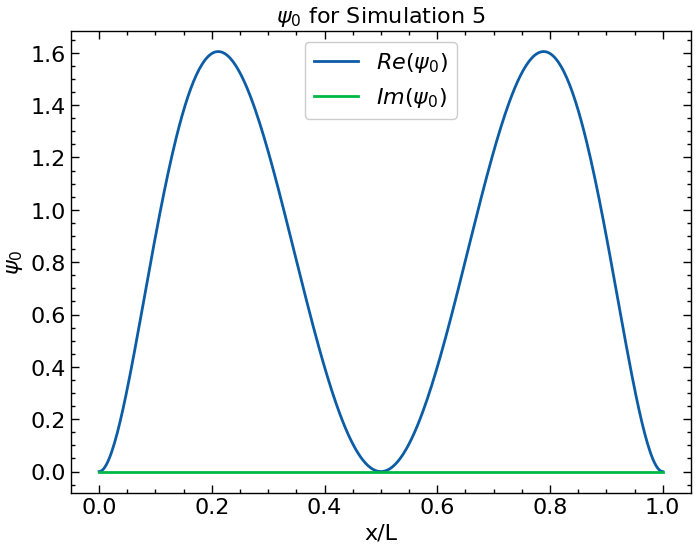

In [3]:
def normalize_curve(y):
    y = y/(np.sqrt(np.sum( dx*np.abs(y)**2 )))
    return y

mu, sigma = 1/2, 1/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))
V2 = 2e5*(x-0.5)**2

#psi0_1 = -x*(x-1)
psi0_1 = np.sqrt(2)*np.sin(np.pi*x)
psi0_2 = x**4*(x-1)**4*(x-0.3)**2*( 1/( (x-0.65)**2 + 0.0025 ) )
psi0_3 = x**2*(x-1)**2*(x-0.5)**2 - 100j*x**2*(x-1)**2*(x-0.5)**2*(x-0.1)*(x-0.4)*(x-0.9)*(x-0.6)
psi0_3 = 500000*x**6*(x-1)**6*(x-0.5)**6 + 5j*x**2*(x-1)**2*(x-0.5)**2*(x-0.4)*(x-0.6)
psi0_4 = -x*(x-1)*(x+0.1) + 1j*(x*(x-1)*(x-1.1))/2
#psi0_5 = (1.0 / (np.pi**0.25 * sigma**0.5)) * np.exp(-(x - 0.5)**2 / (2 * sigma**2))
psi0_5 = x**2*(x-1)**2*(x-0.5)**2

psi0_1 = normalize_curve(psi0_1).astype(complex)
psi0_2 = normalize_curve(psi0_2).astype(complex)
psi0_3 = normalize_curve(psi0_3).astype(complex)
psi0_4 = normalize_curve(psi0_4).astype(complex)
psi0_5 = normalize_curve(psi0_5).astype(complex)

plt.figure(figsize=(10,5))
plt.plot(x,V,label='$Re(\psi_0)$')
plt.title("V'(x') for Experiments 1, 2, 3 and 4")
plt.xlabel("x'=x/L")
plt.ylabel("V'(x')")
plt.grid(False)
plt.savefig('../images/vx1234.png')
plt.show()

fig, axes = plt.subplots(2,2,figsize=(16,12))

plt.subplot(221)

#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi0_1),label='$Re(\psi_0)$')
plt.plot(x,np.imag(psi0_1),label='$Im(\psi_0)$')
plt.legend(loc='upper right')
plt.title(f'$\psi_0$ for Simulation 1')
plt.xlabel('x/L')
plt.ylabel('$\psi_0$')
plt.grid(False)

plt.subplot(222)
#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi0_2),label='$Re(\psi_0)$')
plt.plot(x,np.imag(psi0_2),label='$Im(\psi_0)$')
plt.legend(loc='upper right')
plt.title(f'$\psi_0$ for Simulation 2')
plt.xlabel('x/L')
plt.ylabel('$\psi_0$')
plt.grid(False)
#plt.show()

plt.subplot(223)
#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi0_3),label='$Re(\psi_0)$')
plt.plot(x,np.imag(psi0_3),label='$Im(\psi_0)$')
plt.legend(loc='upper center')
plt.title(f'$\psi_0$ for Simulation 3')
plt.xlabel('x/L')
plt.ylabel('$\psi_0$')
plt.grid(False)
#plt.show()

plt.subplot(224)
#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi0_4),label='$Re(\psi_0)$')
plt.plot(x,np.imag(psi0_4),label='$Im(\psi_0)$')
plt.legend(loc='upper left')
plt.title(f'$\psi_0$ for Simulation 4')
plt.xlabel('x/L')
plt.ylabel('$\psi_0$')
plt.grid(False)

plt.savefig('../images/ic1234.png')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x,V2,label='$Re(\psi_0)$')
plt.title("V'(x') for Harmonic Oscillator")
plt.xlabel("x'=x/L")
plt.ylabel("V'(x')")
plt.grid(False)
plt.savefig('../images/vx5.png')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi0_5),label='$Re(\psi_0)$')
plt.plot(x,np.imag(psi0_5),label='$Im(\psi_0)$')
plt.legend(loc='upper center')
plt.title(f'$\psi_0$ for Simulation 5')
plt.xlabel('x/L')
plt.ylabel('$\psi_0$')
plt.savefig('../images/ic5.png')
plt.grid(False)
plt.show()


### Run experiments

In [4]:
psi1 = generate_data(psi0_1)
psi2 = generate_data(psi0_2)
psi3 = generate_data(psi0_3)
psi4 = generate_data(psi0_4)
psi5 = generate_data(psi0_5,exp5=True)

In [5]:
pd.DataFrame(psi1).to_csv('psi1.csv',index=False)
pd.DataFrame(psi2).to_csv('psi2.csv',index=False)
pd.DataFrame(psi3).to_csv('psi3.csv',index=False)
pd.DataFrame(psi4).to_csv('psi4.csv',index=False)
pd.DataFrame(psi5).to_csv('psi5.csv',index=False)

### Create animations

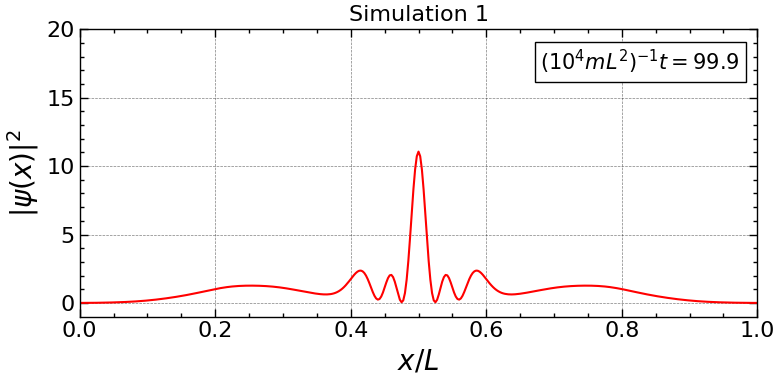

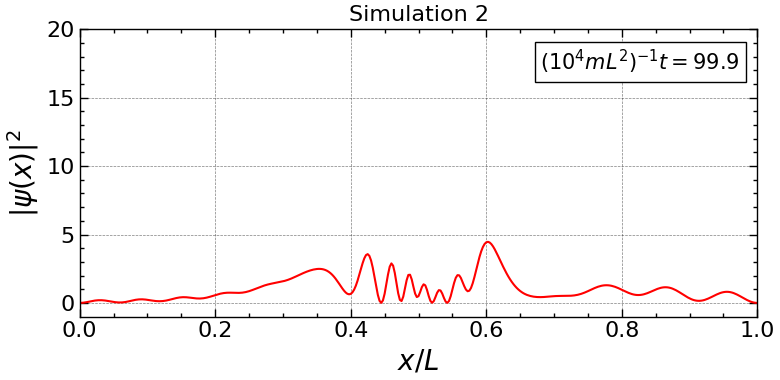

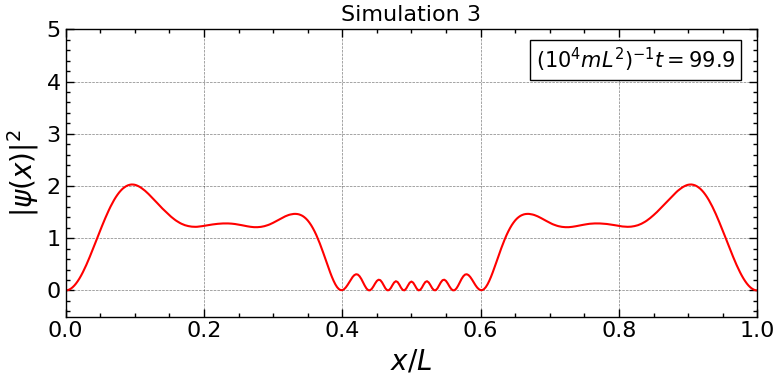

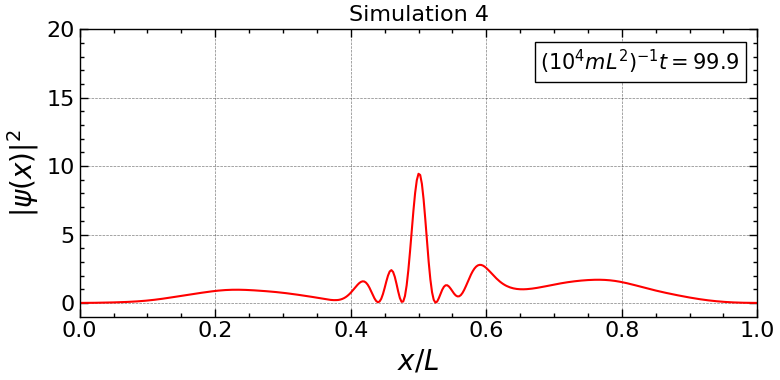

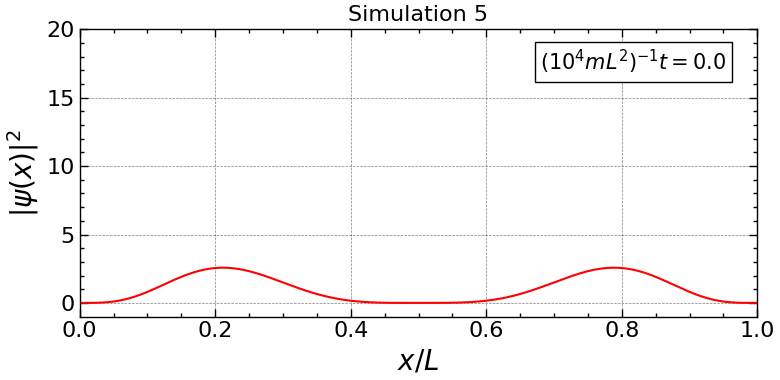

In [6]:
create_animation(psi1,filename='animation1.gif')
create_animation(psi2,filename='animation2.gif')
create_animation(psi3,filename='animation3.gif')
create_animation(psi4,filename='animation4.gif')
create_animation(psi5,filename='animation5.gif')

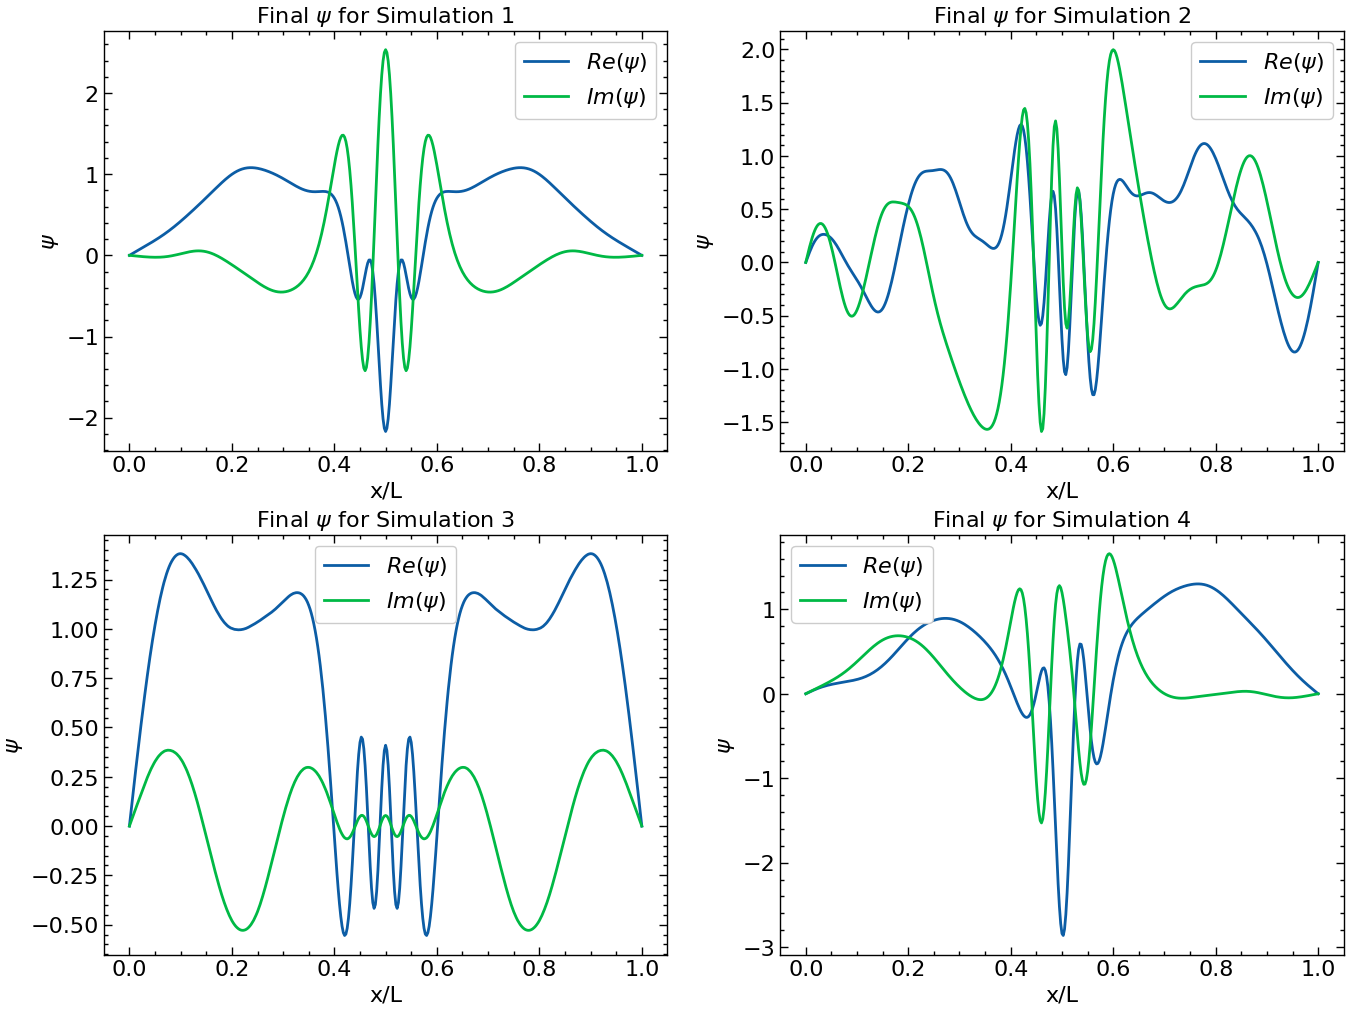

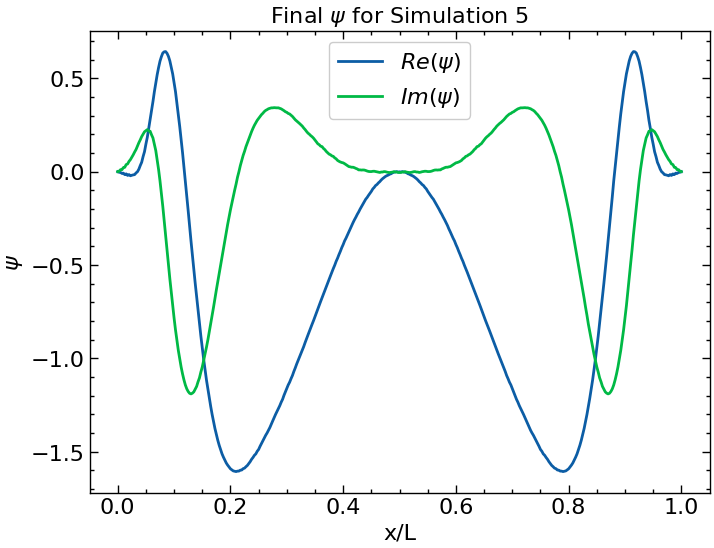

In [7]:
fig, axes = plt.subplots(2,2,figsize=(16,12))

plt.subplot(221)

#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi1[-1]),label='$Re(\psi)$')
plt.plot(x,np.imag(psi1[-1]),label='$Im(\psi)$')
plt.legend(loc='upper right')
plt.title(f'Final $\psi$ for Simulation 1')
plt.xlabel('x/L')
plt.ylabel('$\psi$')
plt.grid(False)

plt.subplot(222)
#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi2[-1]),label='$Re(\psi)$')
plt.plot(x,np.imag(psi2[-1]),label='$Im(\psi)$')
plt.legend(loc='upper right')
plt.title(f'Final $\psi$ for Simulation 2')
plt.xlabel('x/L')
plt.ylabel('$\psi$')
plt.grid(False)
#plt.show()

plt.subplot(223)
#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi3[-1]),label='$Re(\psi)$')
plt.plot(x,np.imag(psi3[-1]),label='$Im(\psi)$')
plt.legend(loc='upper center')
plt.title(f'Final $\psi$ for Simulation 3')
plt.xlabel('x/L')
plt.ylabel('$\psi$')
plt.grid(False)
#plt.show()

plt.subplot(224)
#plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi4[-1]),label='$Re(\psi)$')
plt.plot(x,np.imag(psi4[-1]),label='$Im(\psi)$')
plt.legend(loc='upper left')
plt.title(f'Final $\psi$ for Simulation 4')
plt.xlabel('x/L')
plt.ylabel('$\psi$')
plt.grid(False)

plt.savefig('../images/fs1234.png')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(x,np.real(psi5[-1]),label='$Re(\psi)$')
plt.plot(x,np.imag(psi5[-1]),label='$Im(\psi)$')
plt.legend(loc='upper center')
plt.title(f'Final $\psi$ for Simulation 5')
plt.xlabel('x/L')
plt.ylabel('$\psi$')
plt.grid(False)
plt.savefig('../images/fs5.png')
plt.show()